Filename: \_0_preprocessing.ipynb <br>
Title: Intrusion Detection Prediction - Preprocessing <br>
Author: Raghava | GitHub: @raghavtwenty <br>
Date Created: June 10, 2023 | Last Updated: May 13, 2024 <br>
Language: Python | Version: 3.10.14, 64-bit <br>


Importing Required Libraries


In [2]:
import pandas as pd
import seaborn as sbn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as mpl

Importing Dataset


In [3]:
file_location = pd.read_csv("../datasets/raw_dataset.csv")

data_frame = pd.DataFrame(file_location)

View the dataset


In [4]:
data_frame.head()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label
0,4,305111,25506841,100234870,284579,1657,0,0,0,0,...,0,0,0,1,0,6,992868,992744,-1,0
1,2,209,20671,6316631,274,96,0,0,0,0,...,183877,6303353,183877,1,0,8,90551,90494,-1,3
2,4,150,19774,6475473,3054,166,0,0,0,0,...,502,6439888,502,1,0,6,7516,7418,-1,2
3,1,4699,100986365,124574097,413351,2267,0,0,0,0,...,0,0,0,1,0,8,664849,664714,-1,0
4,3,990,104058,88896,778,792,0,0,0,0,...,715,7152,715,1,0,5,4328,4201,-1,1


Know the detailed information about the dataset


In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4927 entries, 0 to 4926
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Port Number                    4927 non-null   int64
 1   Received Packets               4927 non-null   int64
 2   Received Bytes                 4927 non-null   int64
 3   Sent Bytes                     4927 non-null   int64
 4   Sent Packets                   4927 non-null   int64
 5   Port alive Duration (S)        4927 non-null   int64
 6   Packets Rx Dropped             4927 non-null   int64
 7   Packets Tx Dropped             4927 non-null   int64
 8   Packets Rx Errors              4927 non-null   int64
 9   Packets Tx Errors              4927 non-null   int64
 10  Delta Received Packets         4927 non-null   int64
 11  Delta Received Bytes           4927 non-null   int64
 12  Delta Sent Bytes               4927 non-null   int64
 13  Delta Sent Packets

Check for null values and corresponding count


In [6]:
data_frame.isnull().sum()

Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Packets Rx Dropped               0
Packets Tx Dropped               0
Packets Rx Errors                0
Packets Tx Errors                0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Delta Packets Rx Dropped         0
Delta Packets Tx Dropped         0
Delta Packets Rx Errors          0
Delta Packets Tx Errors          0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
is_valid                         0
Table ID                         0
Active Flow Entries              0
Packets Looked Up   

Detailed description of the dataset


In [7]:
data_frame.describe()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label
count,4927.000000,4927.000000,4.927000e+03,4.927000e+03,4927.000000,4927.000000,4927.0,4927.0,4927.0,4927.0,...,4.927000e+03,4.927000e+03,4.927000e+03,4927.0,4927.0,4927.000000,4.927000e+03,4.927000e+03,4927.0,4927.000000
mean,2.237061,85133.248427,4.776574e+07,4.798439e+07,150534.093363,1393.190785,0.0,0.0,0.0,0.0,...,2.351422e+04,5.934259e+05,2.351422e+04,1.0,0.0,16.731886,4.172801e+05,4.171587e+05,-1.0,1.101888
std,1.063085,122860.550433,4.963905e+07,4.906864e+07,149729.243633,982.318048,0.0,0.0,0.0,0.0,...,1.226911e+05,1.949990e+06,1.226911e+05,0.0,0.0,73.094576,3.885671e+05,3.885634e+05,0.0,1.382482
min,1.000000,10.000000,8.560000e+02,5.775000e+03,42.000000,26.000000,0.0,0.0,0.0,0.0,...,-6.303550e+05,0.000000e+00,-6.303550e+05,1.0,0.0,4.000000,1.050000e+02,5.000000e+01,-1.0,0.000000
25%,1.000000,875.000000,1.170596e+07,1.029537e+07,1106.500000,246.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,5.000000,7.359500e+03,7.230500e+03,-1.0,0.000000
50%,2.000000,3721.000000,2.674802e+07,3.109155e+07,151603.000000,1417.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,6.000000,5.129530e+05,5.128710e+05,-1.0,0.000000
75%,3.000000,179378.000000,7.574614e+07,7.956961e+07,288375.500000,2250.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,7.000000,6.668270e+05,6.666915e+05,-1.0,2.000000
max,4.000000,352772.000000,2.715916e+08,2.392430e+08,421598.000000,3317.000000,0.0,0.0,0.0,0.0,...,1.746749e+06,1.891030e+07,1.746749e+06,1.0,0.0,608.000000,1.012574e+06,1.012439e+06,-1.0,4.000000


Target label and its count


In [8]:
data_frame["Label"].value_counts()

Label
0    2641
3     656
2     646
1     589
4     395
Name: count, dtype: int64

Since, label 0 alone contains more sample, perform under sampling


In [9]:
label_0_indices = data_frame[data_frame["Label"] == 0].index

Under Sampling


In [10]:
indices_to_remove = np.random.choice(
    label_0_indices,
    size=2000,
    replace=False,
)
data_frame = data_frame.drop(indices_to_remove)

Label count after Under Sampling


In [11]:
data_frame["Label"].value_counts()

Label
3    656
2    646
0    641
1    589
4    395
Name: count, dtype: int64

Find the same valued columns


In [12]:
for column in data_frame.columns:
    column_max_value = max(data_frame[column])
    column_min_value = min(data_frame[column])

    # If max and min are same for current column
    if column_max_value == column_min_value:
        print(column)  # Print dropped columns
        data_frame.drop(
            column,
            axis=1,
            inplace=True,
        )  # Drop the current column

print("Same valued columns had been dropped from the data frame.")

Packets Rx Dropped
Packets Tx Dropped
Packets Rx Errors
Packets Tx Errors
Delta Packets Rx Dropped
Delta Packets Tx Dropped
Delta Packets Rx Errors
Delta Packets Tx Errors
is_valid
Table ID
Max Size
Same valued columns had been dropped from the data frame.


In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 1 to 4926
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Port Number                    2927 non-null   int64
 1   Received Packets               2927 non-null   int64
 2   Received Bytes                 2927 non-null   int64
 3   Sent Bytes                     2927 non-null   int64
 4   Sent Packets                   2927 non-null   int64
 5   Port alive Duration (S)        2927 non-null   int64
 6   Delta Received Packets         2927 non-null   int64
 7   Delta Received Bytes           2927 non-null   int64
 8   Delta Sent Bytes               2927 non-null   int64
 9   Delta Sent Packets             2927 non-null   int64
 10  Delta Port alive Duration (S)  2927 non-null   int64
 11  Connection Point               2927 non-null   int64
 12  Total Load/Rate                2927 non-null   int64
 13  Total Load/Latest      

Find the correlation between each column


In [14]:
columns_to_correlate = data_frame.iloc[:, :-1]
columns_to_correlate.corr()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
Port Number,1.000000,0.252370,-0.034394,0.025225,-0.041110,0.017693,0.003846,0.020309,-0.046947,-0.026259,0.011344,0.908395,0.030156,0.055210,0.030156,0.055210,0.030156,0.008266,0.037100,0.037090
Received Packets,0.252370,1.000000,0.235834,0.308183,0.534474,0.279687,0.101214,-0.011130,-0.014515,0.039652,-0.083028,0.228202,0.039386,0.071181,0.039386,0.071181,0.039386,-0.076747,0.718313,0.718313
Received Bytes,-0.034394,0.235834,1.000000,0.664012,0.449018,0.748623,-0.049997,0.119992,0.031163,-0.066122,-0.048477,0.061944,0.077851,0.049543,0.077851,0.049543,0.077851,0.022085,0.436735,0.436679
Sent Bytes,0.025225,0.308183,0.664012,1.000000,0.568606,0.743222,-0.074865,0.008524,0.098878,-0.045771,-0.087523,0.010040,0.059491,0.054790,0.059491,0.054790,0.059491,0.015508,0.531854,0.531810
Sent Packets,-0.041110,0.534474,0.449018,0.568606,1.000000,0.387870,-0.006359,0.028972,0.021135,0.043975,-0.137544,-0.066948,0.043196,0.038828,0.043196,0.038828,0.043196,-0.098111,0.937647,0.937646
Port alive Duration (S),0.017693,0.279687,0.748623,0.743222,0.387870,1.000000,-0.127957,0.024346,0.036452,-0.117409,-0.043869,0.131502,0.032990,0.004888,0.032990,0.004888,0.032990,0.129453,0.396722,0.396645
Delta Received Packets,0.003846,0.101214,-0.049997,-0.074865,-0.006359,-0.127957,1.000000,0.070910,0.069887,0.662069,0.029073,-0.016439,0.019530,-0.003401,0.019530,-0.003401,0.019530,-0.026542,-0.001268,-0.001257
Delta Received Bytes,0.020309,-0.011130,0.119992,0.008524,0.028972,0.024346,0.070910,1.000000,-0.069964,0.024798,-0.005534,0.028338,0.010704,-0.001056,0.010704,-0.001056,0.010704,-0.024097,0.017594,0.017591
Delta Sent Bytes,-0.046947,-0.014515,0.031163,0.098878,0.021135,0.036452,0.069887,-0.069964,1.000000,0.119188,-0.003737,-0.068156,0.274320,0.197126,0.274320,0.197126,0.274320,0.051266,-0.001529,-0.001528
Delta Sent Packets,-0.026259,0.039652,-0.066122,-0.045771,0.043975,-0.117409,0.662069,0.024798,0.119188,1.000000,0.026642,-0.050187,0.018923,-0.001910,0.018923,-0.001910,0.018923,-0.022983,-0.003580,-0.003570


Plot the heatmap for better visualization


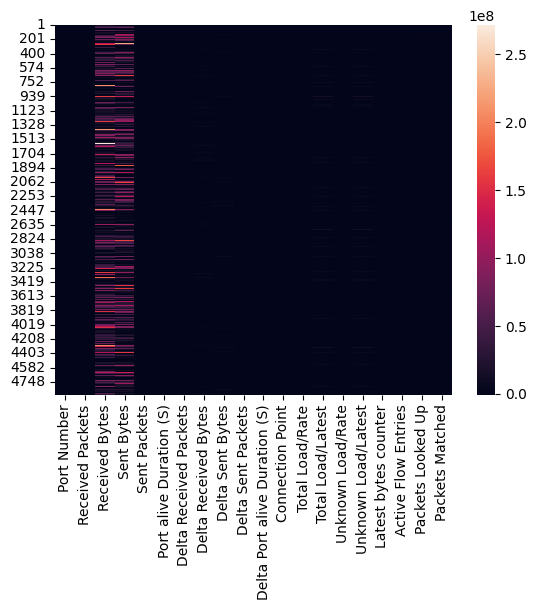

In [15]:
sbn.heatmap(columns_to_correlate)
mpl.show()

The above heatmap is incorrect. Since the range of the column values differs. <br>
The Min-Max Normalization is to be applied to get the correct correlation


In [16]:
# Scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(columns_to_correlate.to_numpy())

new_data_frame = pd.DataFrame(
    df_scaled,
    columns=columns_to_correlate.columns,
)

Find the scaled Min-Max values for future transformation


In [17]:
scaled_min = scaler.data_min_
print(scaled_min)
scaled_max = scaler.data_max_
print(scaled_max)

[ 1.00000e+00  1.00000e+01  8.56000e+02  5.77500e+03  4.20000e+01
  2.60000e+01  0.00000e+00  0.00000e+00  2.78000e+02  2.00000e+00
  4.00000e+00  1.00000e+00 -6.30355e+05  0.00000e+00 -6.30355e+05
  0.00000e+00 -6.30355e+05  4.00000e+00  1.05000e+02  5.00000e+01]
[4.00000000e+00 3.52772000e+05 2.71591638e+08 2.39233335e+08
 4.21315000e+05 3.31700000e+03 1.56590000e+04 6.30270800e+06
 6.30270800e+06 1.55920000e+04 5.00000000e+00 5.00000000e+00
 1.74674900e+06 1.74674920e+07 1.74674900e+06 1.74674920e+07
 1.74674900e+06 6.08000000e+02 1.01156300e+06 1.01142800e+06]


Correlation after scaling


In [18]:
new_data_frame.corr()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
Port Number,1.000000,0.252370,-0.034394,0.025225,-0.041110,0.017693,0.003846,0.020309,-0.046947,-0.026259,0.011344,0.908395,0.030156,0.055210,0.030156,0.055210,0.030156,0.008266,0.037100,0.037090
Received Packets,0.252370,1.000000,0.235834,0.308183,0.534474,0.279687,0.101214,-0.011130,-0.014515,0.039652,-0.083028,0.228202,0.039386,0.071181,0.039386,0.071181,0.039386,-0.076747,0.718313,0.718313
Received Bytes,-0.034394,0.235834,1.000000,0.664012,0.449018,0.748623,-0.049997,0.119992,0.031163,-0.066122,-0.048477,0.061944,0.077851,0.049543,0.077851,0.049543,0.077851,0.022085,0.436735,0.436679
Sent Bytes,0.025225,0.308183,0.664012,1.000000,0.568606,0.743222,-0.074865,0.008524,0.098878,-0.045771,-0.087523,0.010040,0.059491,0.054790,0.059491,0.054790,0.059491,0.015508,0.531854,0.531810
Sent Packets,-0.041110,0.534474,0.449018,0.568606,1.000000,0.387870,-0.006359,0.028972,0.021135,0.043975,-0.137544,-0.066948,0.043196,0.038828,0.043196,0.038828,0.043196,-0.098111,0.937647,0.937646
Port alive Duration (S),0.017693,0.279687,0.748623,0.743222,0.387870,1.000000,-0.127957,0.024346,0.036452,-0.117409,-0.043869,0.131502,0.032990,0.004888,0.032990,0.004888,0.032990,0.129453,0.396722,0.396645
Delta Received Packets,0.003846,0.101214,-0.049997,-0.074865,-0.006359,-0.127957,1.000000,0.070910,0.069887,0.662069,0.029073,-0.016439,0.019530,-0.003401,0.019530,-0.003401,0.019530,-0.026542,-0.001268,-0.001257
Delta Received Bytes,0.020309,-0.011130,0.119992,0.008524,0.028972,0.024346,0.070910,1.000000,-0.069964,0.024798,-0.005534,0.028338,0.010704,-0.001056,0.010704,-0.001056,0.010704,-0.024097,0.017594,0.017591
Delta Sent Bytes,-0.046947,-0.014515,0.031163,0.098878,0.021135,0.036452,0.069887,-0.069964,1.000000,0.119188,-0.003737,-0.068156,0.274320,0.197126,0.274320,0.197126,0.274320,0.051266,-0.001529,-0.001528
Delta Sent Packets,-0.026259,0.039652,-0.066122,-0.045771,0.043975,-0.117409,0.662069,0.024798,0.119188,1.000000,0.026642,-0.050187,0.018923,-0.001910,0.018923,-0.001910,0.018923,-0.022983,-0.003580,-0.003570


Heatmap after scaling


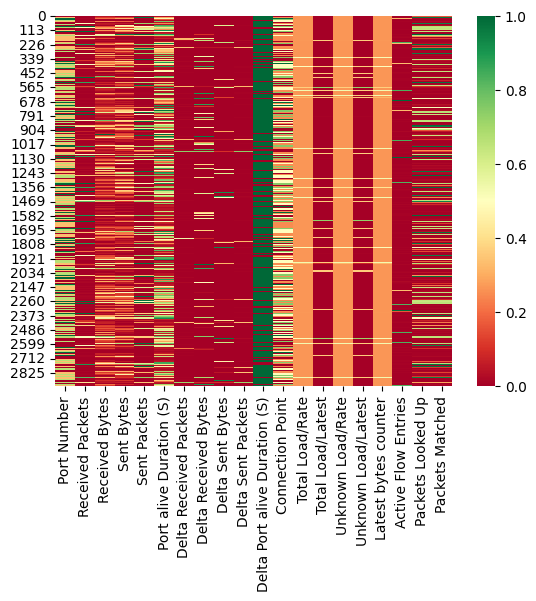

In [19]:
sbn.heatmap(
    new_data_frame,
    cmap="RdYlGn",
)
mpl.show()

Now, we can clearly see that before scaling the heatmap base was le8. <br>
After scaling the base for heatmap had been changed to 0 - 1


Drop the least correlated columns


In [20]:
updated_data_frame = new_data_frame.drop(
    [
        "Delta Received Packets",
        "Delta Sent Packets",
        "Total Load/Latest",
        "Unknown Load/Rate",
        "Unknown Load/Latest",
        "Latest bytes counter",
        "Packets Looked Up",
    ],
    axis=1,
)
# [6, 9, 13, 14, 15, 16, 18] indices with respect to updated dataframe

Drop the least correlated columns in scaled min, max values


In [21]:
index_locations_to_remove = [6, 9, 13, 14, 15, 16, 18]

# Remove items at the specified index locations
scaled_min_filtered = [
    scaled_min[i] for i in range(len(scaled_min)) if i not in index_locations_to_remove
]

scaled_max_filtered = [
    scaled_max[i] for i in range(len(scaled_max)) if i not in index_locations_to_remove
]

print("Filtered scaled_min list:")
print(scaled_min_filtered)

print("\nFiltered scaled_max list:")
print(scaled_max_filtered)

Filtered scaled_min list:
[1.0, 10.0, 856.0, 5775.0, 42.0, 26.0, 0.0, 278.0, 4.0, 1.0, -630355.0, 4.0, 50.0]

Filtered scaled_max list:
[4.0, 352772.0, 271591638.0, 239233335.0, 421315.0, 3317.0, 6302708.0, 6302708.0, 5.0, 5.0, 1746749.0, 608.0, 1011428.0]


Updated dataframe


In [22]:
updated_data_frame.head()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Bytes,Delta Sent Bytes,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Active Flow Entries,Packets Matched
0,0.333333,0.000564,0.000073,0.026380,0.000551,0.021270,0.000560,0.437557,1.0,0.25,0.342531,0.006623,0.089427
1,1.000000,0.000397,0.000070,0.027044,0.007150,0.042540,0.000088,0.000919,1.0,0.75,0.265389,0.003311,0.007285
2,0.666667,0.002778,0.000380,0.000347,0.001747,0.232756,0.000088,0.000044,1.0,0.75,0.265478,0.001656,0.004104
3,0.000000,0.000995,0.046419,0.000102,0.000686,0.028867,0.000000,0.000055,1.0,0.00,0.265178,0.006623,0.157985
4,0.333333,0.004884,0.139417,0.159087,0.007465,0.646004,0.000000,0.000044,1.0,0.50,0.265178,0.000000,0.014647


In [23]:
updated_data_frame.describe()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Bytes,Delta Sent Bytes,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Active Flow Entries,Packets Matched
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2.927000e+03,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,0.405876,0.109599,0.121487,0.128869,0.151822,0.313723,0.055822,4.658061e-02,0.838743,0.364708,0.272384,0.033342,0.180208
std,0.347302,0.253964,0.158419,0.166508,0.282056,0.308042,0.190949,1.762014e-01,0.367831,0.288581,0.043850,0.155822,0.307311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.001140,0.004890,0.000597,0.000968,0.037982,0.000044,3.173379e-07,1.000000,0.000000,0.265178,0.001656,0.002600
50%,0.333333,0.004819,0.054604,0.053287,0.004494,0.212397,0.000088,4.410997e-05,1.000000,0.250000,0.265178,0.003311,0.010710
75%,0.666667,0.013423,0.168076,0.185447,0.100415,0.582802,0.000120,5.140874e-05,1.000000,0.500000,0.265178,0.006623,0.182463
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000


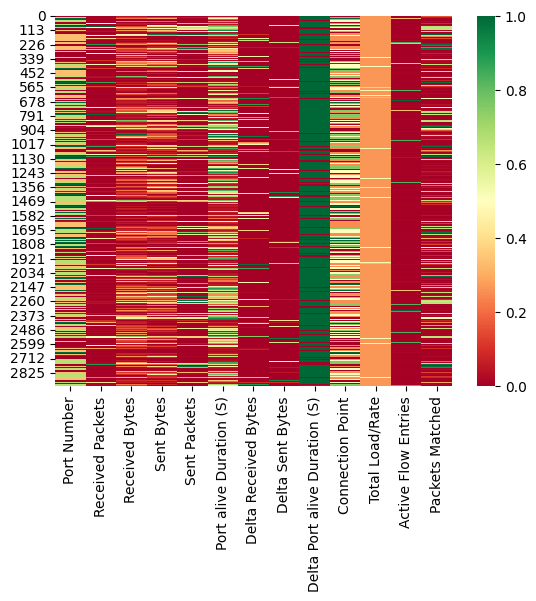

In [24]:
sbn.heatmap(
    updated_data_frame,
    cmap="RdYlGn",
)
mpl.show()

Append the label column to the updated data frame


In [25]:
updated_data_frame["Label"] = data_frame["Label"].values

In [26]:
updated_data_frame.head()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Bytes,Delta Sent Bytes,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Active Flow Entries,Packets Matched,Label
0,0.333333,0.000564,0.000073,0.026380,0.000551,0.021270,0.000560,0.437557,1.0,0.25,0.342531,0.006623,0.089427,3
1,1.000000,0.000397,0.000070,0.027044,0.007150,0.042540,0.000088,0.000919,1.0,0.75,0.265389,0.003311,0.007285,2
2,0.666667,0.002778,0.000380,0.000347,0.001747,0.232756,0.000088,0.000044,1.0,0.75,0.265478,0.001656,0.004104,1
3,0.000000,0.000995,0.046419,0.000102,0.000686,0.028867,0.000000,0.000055,1.0,0.00,0.265178,0.006623,0.157985,3
4,0.333333,0.004884,0.139417,0.159087,0.007465,0.646004,0.000000,0.000044,1.0,0.50,0.265178,0.000000,0.014647,4


Save the new dataframe to csv for modelling


In [27]:
updated_data_frame.to_csv(
    "../datasets/cleaned_dataset.csv",
    index=False,
    header=True,
)
print("Preprocessed dataset saved successfully.")

Preprocessed dataset saved successfully.
